# COVID-19 Cases by County

In [8]:
# these are the Python packages being used for data collection and analysis
import datetime
import requests
import pandas as pd

# this is the URL that supplies the COVID data by county
URL = "https://opendata.arcgis.com/datasets/0573e90adab5434f97b082590c503bc1_0.geojson"

r = requests.get(URL)
r
# the output below will say <Response [200]> if the request succeeded
# if it says something else, try running the cell again

<Response [200]>

In [9]:
# this collects the relevant part of the response object and converts it
# into something we can turn into a dataframe (table)
json_list = []
for item in r.json()['features']:
  json_list.append(item['properties'])

# this formats the dataframe to have county columns and date rows
df = pd.DataFrame(json_list)
df = df.set_index('DATE')
df.index = df.index.map(pd.to_datetime)
df = df.drop('OBJECTID', axis=1)

# this checks whether today's data is included in the dataframe
if df.index[-1].date() == datetime.datetime.now(tz=datetime.timezone(datetime.timedelta(hours=-4))).date():
  print("Fresh data present, good to go")
else:
  print("Today's data is NOT present")

Today's data is NOT present


In [ ]:
# this is the list of counties in the dataframe
# you'll have to reproduce how they're rendered here to visualize them
df.columns

Index(['Allegany', 'Anne_Arundel', 'Baltimore', 'Baltimore_City', 'Calvert',
       'Caroline', 'Carroll', 'Cecil', 'Charles', 'Dorchester', 'Frederick',
       'Garrett', 'Harford', 'Howard', 'Kent', 'Montgomery', 'Prince_Georges',
       'Queen_Annes', 'Somerset', 'St_Marys', 'Talbot', 'Washington',
       'Wicomico', 'Worcester', 'Unknown'],
      dtype='object')

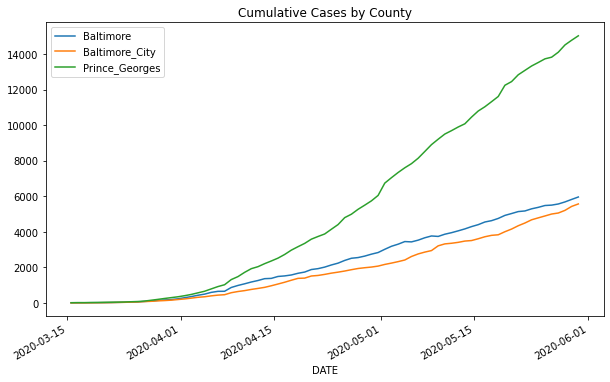

In [10]:
# these are the counties used for the visualization
# if you want to add more, make sure they're comma-separated and enclosed in quotes
counties = ['Baltimore', 'Baltimore_City', 'Prince_Georges']

df[counties].plot.line(title="Cumulative Cases by County", figsize=(10,6));

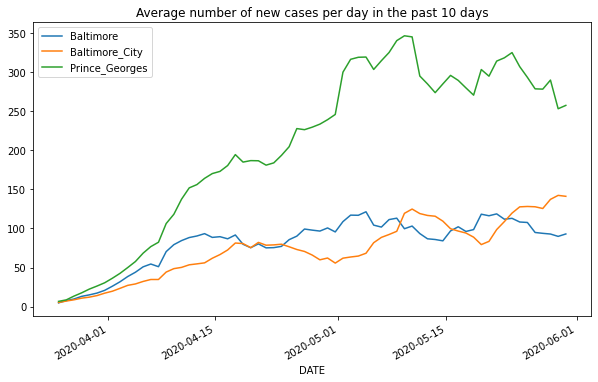

In [11]:
# to look at new cases over the past n days,
# set this variable to your desired value of n
past_days = 10

# these are the counties used for the visualization
# if you want to add more, make sure they're comma-separated and enclosed in quotes
counties2 = ['Baltimore', 'Baltimore_City', 'Prince_Georges']

# this generates a new dataframe based on cumulative case count dataframe
# the value for a given (county, date) is equal to the number of new cases
# in that county in the past n days
df2 = df.diff(periods=past_days) / past_days

df2[counties2].plot.line(title=f"Average number of new cases per day in the past {past_days} days", figsize=(10,6));